In [20]:
import sys
sys.path.append('../erec')
from numpy import *
from Params import *
from PlotFuncs import *
from AtomicFuncs import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean

def f_nl_ion_sq_alt(q,E_r,l,c_nlk,n_lk,Z_lk,np=100):
    ppr = sqrt(2*m_e*E_r)
    C = (2*l+1)*(ppr**2.0)/((4*pi**3.0)*q)
    f = zeros(shape=size(q))
    for i in range(0,size(q)):
        pmin = abs(ppr-q[i])
        pmax = ppr+q[i]
        pvals = logspace(log10(pmin),log10(pmax),np)
        chi2 = chi_nl_sq(pvals,l,c_nlk,n_lk,Z_lk)
        f[i] = C[i]*trapz(pvals*chi2,pvals)
    return f

# s-shell
n_s = array([1]+[2]*2+[3]*3+[4]*3+[5]*4)
Z_s = array([54.9179,47.2500,26.0942,68.1771,16.8296,12.0759,31.9030,8.0145,5.8396,14.7123,3.8555,2.6343,1.8124])
c_5s = array([-0.022510,-0.021077,0.088978,-0.000081,0.095199,-0.398492,0.025623,0.274471,0.291110,0.011171,-0.463123,-0.545266,-0.167779])

ne = 500
nq = 500
E_r_vals = logspace(-1,3,ne)
q_vals = logspace(-1.0,4.0,nq)

F = zeros(shape=(ne,nq))
for i in range(0,ne):
    F[i,:] = f_nl_ion_sq(q_vals,E_r_vals[i],0,c_5s,n_s,Z_s)

KeyboardInterrupt: 

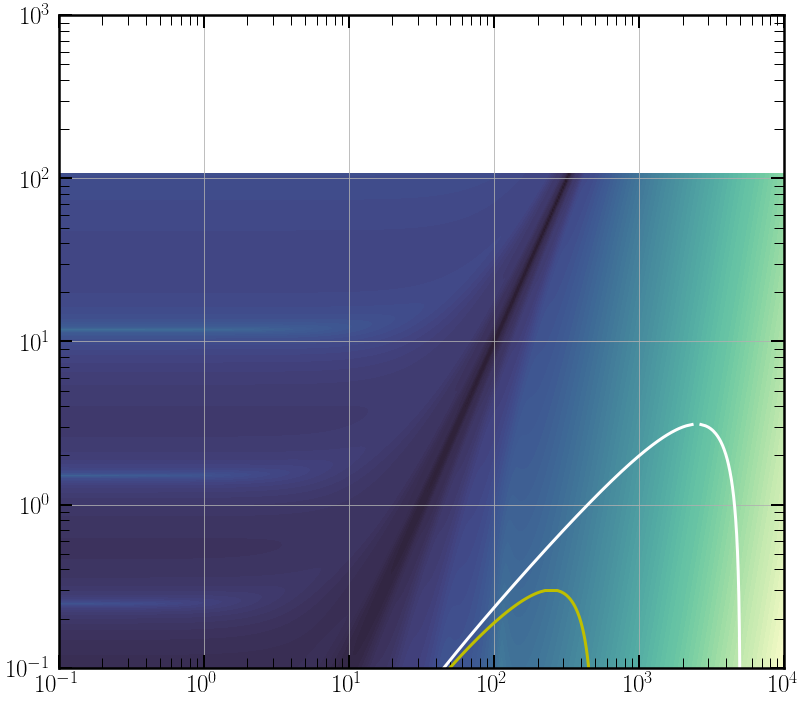

In [42]:

fig,ax1 = MySquarePlot()

ax1.contourf(q_vals,E_r_vals,log10(F),100,cmap=cmocean.cm.deep)

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.grid()
ax1.set_xlim([q[0],q[-1]])


vmax = ((750.0)*1000)/3.0e8 # natural units
qmax = zeros(shape=(ne))
qmin = zeros(shape=(ne))
E_B = Xe131.BindingEnergies[0]/1000.0


m_vals = [10.0,50.0,100.0,500.0,1000.0,5000.0]
nm = size(m_vals)
for im in range(0,nm):
    m_DM_keV = m_vals[im]*1000.0
    for i in range(0,ne): # over energies
        E_r = E_r_vals[i]
        if E_r<(0.5*m_DM_keV*vmax**2.0-E_B):
            # Form factor
            qmax[i] = m_DM_keV*vmax*(1.0+sqrt(1-2*(E_r+E_B)/(m_DM_keV*vmax**2.0)))
            qmin[i] = m_DM_keV*vmax*(1.0-sqrt(1-2*(E_r+E_B)/(m_DM_keV*vmax**2.0)))
        else:
            break
    plt.plot(append(qmin[qmin>0],flipud(qmax[qmax>0])),append(E_r_vals[qmin>0],flipud(E_r_vals[qmax>0])),'w-',lw=3)


m1 = 100.0
m_DM_keV = m1*1000.0
qmax = zeros(shape=(ne))
qmin = zeros(shape=(ne))
for i in range(0,ne): # over energies
    E_r = E_r_vals[i]
    if E_r<(0.5*m_DM_keV*vmax**2.0-E_B):
        # Form factor
        qmax[i] = m_DM_keV*vmax*(1.0+sqrt(1-2*(E_r+E_B)/(m_DM_keV*vmax**2.0)))
        qmin[i] = m_DM_keV*vmax*(1.0-sqrt(1-2*(E_r+E_B)/(m_DM_keV*vmax**2.0)))
    else:
        break
plt.plot(append(qmin[qmin>0],flipud(qmax[qmax>0])),append(E_r_vals[qmin>0],flipud(E_r_vals[qmax>0])),'y-',lw=3)

plt.show()

In [29]:
m1 = 1000.0

m_DM_keV = m1*1000.0

vmax = ((750.0)*1000)/3.0e8 # natural units
qmax = zeros(shape=(ne))
qmin = zeros(shape=(ne))
E_B = Xe131.BindingEnergies[0]/1000.0
for i in range(0,ne): # over energies
    E_r = E_r_vals[i]
    if E_r<(0.5*m_DM_keV*vmax**2.0-E_B):
        # Form factor
        qmax[i] = m_DM_keV*vmax*(1.0+sqrt(1-2*(E_r+E_B)/(m_DM_keV*vmax**2.0)))
        qmin[i] = m_DM_keV*vmax*(1.0-sqrt(1-2*(E_r+E_B)/(m_DM_keV*vmax**2.0)))
    else:
        break


In [30]:
qmin

array([  45.37171857,   46.13076918,   46.90420162,   47.69229311,
         48.49532642,   49.31358996,   50.14737792,   50.99699036,
         51.86273337,   52.74491917,   53.64386627,   54.55989959,
         55.49335061,   56.44455749,   57.41386523,   58.40162583,
         59.40819842,   60.43394943,   61.47925276,   62.54448991,
         63.6300502 ,   64.73633089,   65.8637374 ,   67.01268347,
         68.18359134,   69.37689197,   70.5930252 ,   71.83243998,
         73.09559457,   74.38295675,   75.69500402,   77.03222387,
         78.39511395,   79.78418235,   81.19994785,   82.6429401 ,
         84.11369997,   85.61277973,   87.14074338,   88.6981669 ,
         90.28563852,   91.90375906,   93.55314218,   95.23441474,
         96.94821706,   98.69520332,  100.47604183,  102.29141543,
        104.14202181,  106.02857392,  107.95180029,  109.91244551,
        111.91127053,  113.94905317,  116.02658848,  118.14468922,
        120.3041863 ,  122.50592928,  124.7507868 ,  127.03964